[-0.25128767  3.11982544  0.39774615  0.67581032  3.11348562  3.28220966
  1.05634061  0.82995507  0.9574822  -0.14567623]
4.1875882771945685


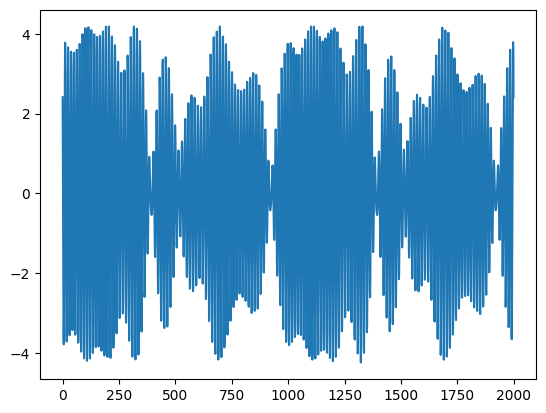

RAP= 2.44 dB


In [58]:
import numpy as np
from scipy import optimize as op
import matplotlib.pyplot as plt
 
def phi_(x):
    t=np.linspace(0,2,2000)
    f=np.zeros(2000)
    for i in range(10):
        f=f+np.cos(2*3.14159265*(70+i)*t+x[i])
    return np.max(f)

def callback(xk):
    print(xk)
 
 
# 初始迭代点
x0 = np.random.rand(10)
 
# 最小化优化器，方法：Nelder-Mead（单纯形法）
#res = op.minimize(phi_, x0, method='Nelder-Mead')
#res = op.minimize(phi_, x0, method='L-BFGS-B')
res = op.minimize(phi_, x0, method='COBYLA')
print(res.x)
print(phi_(res.x))

fig, ax = plt.subplots() 
fig.clear(True) 
t=np.linspace(0,2,2000)
f=np.zeros(2000)
for i in range(10):
    f=f+np.cos(2*3.14159265*(70+i)*t+res.x[i])
plt.plot(f)
plt.show()
print('RAP= %.2f dB' %(10*np.log10(np.square(np.max(f))/10)))

phi_opt: [3.62388251 1.83268608 0.06546317 2.4894124  5.62096452 1.65177435
 3.08987312 5.30909986 5.38964814 5.53548678]


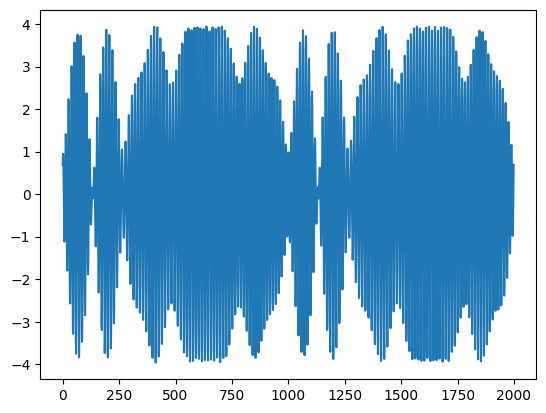

RAP= 1.91 dB


In [56]:
#使用随机搜索算法优化
import numpy as np
import matplotlib.pyplot as plt
PI=3.14159265
def phi_(x):
    t=np.linspace(0,2,2000)
    f=np.zeros(2000)
    for i in range(10):
        f=f+np.cos(2*PI*(70+i)*t+x[i])
    return np.max(f)

N=1000#随机搜索次数
temp=100
for i in range(N):
    phi=np.random.rand(10)*PI*2
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi

old_phi=temp_phi
for i in range(N):
    phi=old_phi+np.random.rand(10)*PI-PI/2
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi
old_phi=temp_phi
for i in range(1,N//10):
    phi=old_phi+np.random.rand(10)*PI-PI/2
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi

old_phi=temp_phi
for i in range(N):
    phi=old_phi+np.random.rand(10)*PI/4-PI/8
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi
old_phi=temp_phi
for i in range(1,N//10):
    phi=old_phi+np.random.rand(10)*PI/4-PI/8
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi

old_phi=temp_phi
for i in range(N):
    phi=old_phi+np.random.rand(10)*PI/16-PI/32
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi
old_phi=temp_phi
for i in range(1,N//10):
    phi=old_phi+np.random.rand(10)*PI/16-PI/32
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi

old_phi=temp_phi
for i in range(N):
    phi=old_phi+np.random.rand(10)*PI/64-PI/128
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi
old_phi=temp_phi
for i in range(1,N//10):
    phi=old_phi+np.random.rand(10)*PI/64-PI/128
    tem=phi_(phi)
    if tem<temp:
        temp=tem
        temp_phi=phi

phi_opt=temp_phi
print('phi_opt:',phi_opt)
fig, ax = plt.subplots() 
fig.clear(True) 
t=np.linspace(0,2,2000)
f=np.zeros(2000)
for i in range(10):
    f=f+np.cos(2*PI*(70+i)*t+phi_opt[i])
plt.plot(f)
plt.show()
print('RAP= %.2f dB' %(10*np.log10(np.square(np.max(f))/10)))

0.14413929036013595